# Whistle Detection

## Dataset Preparation

In [11]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../../src")
import yaml
from omegaconf import OmegaConf
from matplotlib import pyplot as plt
from utils import num_params

# Load the configuration
file_path = "config.yaml"
with open(file_path, 'r') as file:
    config = OmegaConf.create(yaml.safe_load(file))
    
import torch
import numpy as np
torch.manual_seed(config.seed)
np.random.seed(config.seed)

In [12]:
from data import WhistleDataset
from data import WHISTLEDATA_CONFIG as DATA_PARAMS

dataset = WhistleDataset(name = 'whistle/saved/test2', tobeloaded=True, params=DATA_PARAMS)
dataset.summarize()

DATA LOADED!

N Examples: 762116
N Classes: 2
Classes: [0. 1.]
 - Class 0: 381058 (50.0)
 - Class 1: 381058 (50.0)


## Training

In [13]:
from models import WhistleNet, CCNN

name = 'test1_ccnn'
model = CCNN(name, in_channels=1, out_channels=1, config=config)

In [14]:
from core.trainer import Trainer
import time
from models import WHISTLETRAIN_CONFIG as TRAIN_PARAMS
train_model = True

trainer = Trainer(params=TRAIN_PARAMS)
start_time = time.time()
if train_model:
    trainer.fit(model,dataset)
    model.training_time = time.time() - start_time

  0%|          | 0/5955 [00:00<?, ?it/s]


RuntimeError: Expected floating point type for target with class probabilities, got Long

MODEL LOADED!


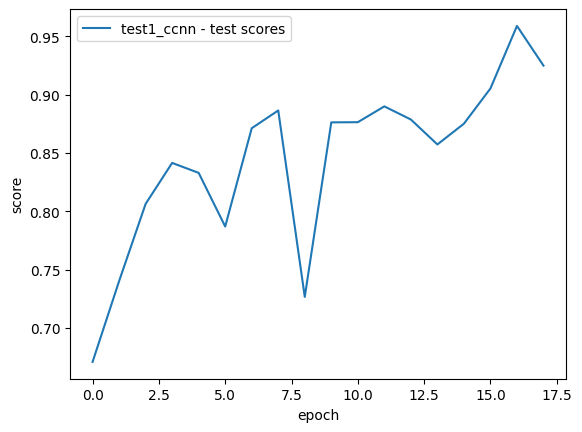

In [ ]:
import matplotlib.pyplot as plt # type: ignore

complete_plot = False
    
model.load(name)
plt.plot(model.test_scores, label=f'{name} - test scores')
if complete_plot:
    plt.plot(model.train_scores, label=f'{name} - train scores')
    plt.plot(model.val_scores, label=f'{name} - val scores')
        
plt.legend()
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

## Onnx Model

## Inference

frame 0, time 0.00
Prediction: tensor([[0.7174, 0.2826]]), elapsed: 0.0020
tensor([[0.7174, 0.2826]]): NO
frame 1, time 0.02
Prediction: tensor([[0.5195, 0.4805]]), elapsed: 0.0013
tensor([[0.5195, 0.4805]]): NO
frame 2, time 0.05
Prediction: tensor([[0.5408, 0.4592]]), elapsed: 0.0012
tensor([[0.5408, 0.4592]]): NO
frame 3, time 0.07
Prediction: tensor([[0.5756, 0.4244]]), elapsed: 0.0011
tensor([[0.5756, 0.4244]]): NO
frame 4, time 0.09
Prediction: tensor([[0.5662, 0.4338]]), elapsed: 0.0015
tensor([[0.5662, 0.4338]]): NO
frame 5, time 0.12
Prediction: tensor([[0.5656, 0.4344]]), elapsed: 0.0015
tensor([[0.5656, 0.4344]]): NO
frame 6, time 0.14
Prediction: tensor([[0.5053, 0.4947]]), elapsed: 0.0013
tensor([[0.5053, 0.4947]]): NO
frame 7, time 0.16
Prediction: tensor([[0.5460, 0.4540]]), elapsed: 0.0011
tensor([[0.5460, 0.4540]]): NO
frame 8, time 0.19
Prediction: tensor([[0.5175, 0.4825]]), elapsed: 0.0011
tensor([[0.5175, 0.4825]]): NO
frame 9, time 0.21
Prediction: tensor([[0.5863

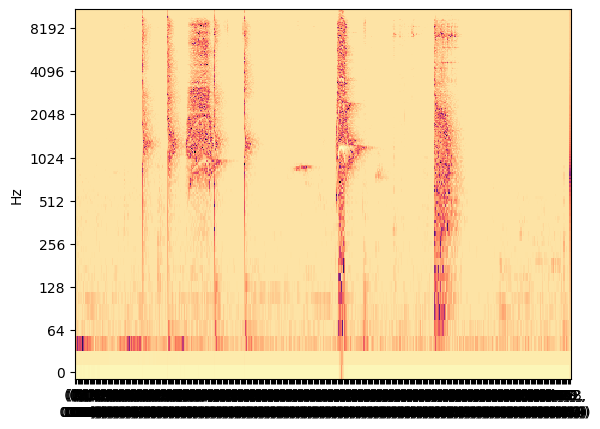

In [ ]:
import torch # type: ignore
# import sounddevice as sd
from utils import Audio, project_root

def classify(window):
    with torch.no_grad():
        start = time.time()
        prediction = torch.softmax(model(window), dim=1)
        elapsed = time.time() - start
    predicted_class = torch.argmax(prediction).item()
    print(f"Prediction: {prediction}, elapsed: {elapsed:.4f}")
    if predicted_class == 0:
        print(f"{prediction}: NO")
    else:
        print(f"{prediction}: YES")
    return predicted_class


projroot = project_root()
audio = Audio(name="test4", datapath=f'{projroot}/data/whistle/raw/test')
for i in range(audio.S.shape[1]):
    window = torch.from_numpy(audio.S[:,i].reshape(1,1,513))
    print(f"frame {i}, time {audio.frame2time(i):.2f}")
    classify(window)
audio.freq_plot()